### MIBI-TOF dataset to study  the spatial organization of the tumor microenvironment and breast cancer progression

#### Conditions:
1. Normal (N=9)
2. Non-progressors (ctrl) (N=44)
3. Progressors (case) (N=14)


The MIBI-TOF breast cancer data from Risom et al. is available in a public Mendeley data repository: https://data.mendeley.com/datasets/d87vg86zd8.

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
import graphcompass as gc

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load data

In [4]:
# change as needed
WD = "/data/mibitof_breast_cancer"

In [5]:
adata = sc.read_h5ad(os.path.join(WD, "adata_processed.h5ad"))
adata.obs_names_make_unique()
adata

/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 69672 × 59
    obs: 'event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status', 'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status', 'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus', 'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus', 'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status', 'P63status', 'myoep_dist_label', 'myoep_dist_MinDist', 'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist', 'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR', 'Neighbor_dist_MYOEP', 'Neighbor_dist_FI

## Inspect data

In [6]:
print(np.max(adata.X))
print(np.min(adata.X))

1865.0
0.0


In [7]:
adata.obs['Status'].value_counts()

Status
ctrl      37684
case      12729
ipsinv    11792
normal     7467
Name: count, dtype: int64

In [8]:
adata.obs['batch'].value_counts()

batch
47    2079
7     1549
42    1547
36    1424
43    1420
      ... 
3      463
66     436
27     411
64     387
39     254
Name: count, Length: 79, dtype: int64

In [9]:
adata.obs['phenotype'].cat.categories

Index(['APC', 'BCELL', 'CAF', 'CD4T', 'CD8T', 'DC', 'ENDO', 'FIBRO_VIMonly',
       'IMMUNEOTHER', 'MACS', 'MAST', 'MONO', 'MONODC', 'MYOEP', 'MYOFIBRO',
       'NEUT', 'NORMFIBRO', 'OTHER', 'TCELL', 'TUMOR_CK5', 'TUMOR_ECADCK',
       'TUMOR_EMT', 'TUMOR_LUMINAL'],
      dtype='object')

## Create graph from spatial coordinates, determine threshold values, and create filtration curves

In [10]:
# Column in anndata.AnnData.obs which stores sample/batch information
library_key = 'library_id'
# Column in anndata.AnnData.obs which stores cell type information
cell_type_key = 'phenotype'
# Column in anndata.AnnData.obs which stores condition information
condition_key = 'Status'

In [11]:
adata.obs[library_key] = adata.obs['batch'].copy()

In [12]:
# We're interested in comparing the spatial organization of the following samples:
patients = pd.unique(adata[adata.obs['Status'] != 'ipsinv'].obs[library_key])
patients

['0', '1', '2', '3', '4', ..., '74', '75', '76', '77', '78']
Length: 67
Categories (67, object): ['0', '1', '2', '3', ..., '75', '76', '77', '78']

In [13]:
# MIBI-TOF data is not laid out in a grid. Use coord_type='generic'.
kwargs_spatial_neighbors = {
    "coord_type": "generic",
    "delaunay": True,
}

In [14]:
gc.tl._filtration_curves.compare_conditions(
    adata,
    library_key=library_key,
    cluster_key=cell_type_key,
    condition_key=condition_key,
    attribute="weight",
    sample_ids=patients,
    compute_spatial_graphs=True,
    kwargs_spatial_neighbors=kwargs_spatial_neighbors,
    copy=False,
)

Computing spatial graph...


100%|██████████| 1000/1000 [00:00<00:00, 3141.83/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 3717.70/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 3210.03/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 3772.17/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in div

100%|██████████| 1000/1000 [00:00<00:00, 2619.83/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 2978.79/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 2697.20/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 3144.29/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in div

100%|██████████| 1000/1000 [00:00<00:00, 3199.85/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 2162.98/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 3230.09/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 2768.19/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in div

Computing edge weights...


100%|██████████| 67/67 [00:02<00:00, 27.33it/s]


Computing edge weight threshold values...
Creating filtration curves...


100%|██████████| 67/67 [00:00<00:00, 455.07it/s]

Done!


## Plot filtration curves

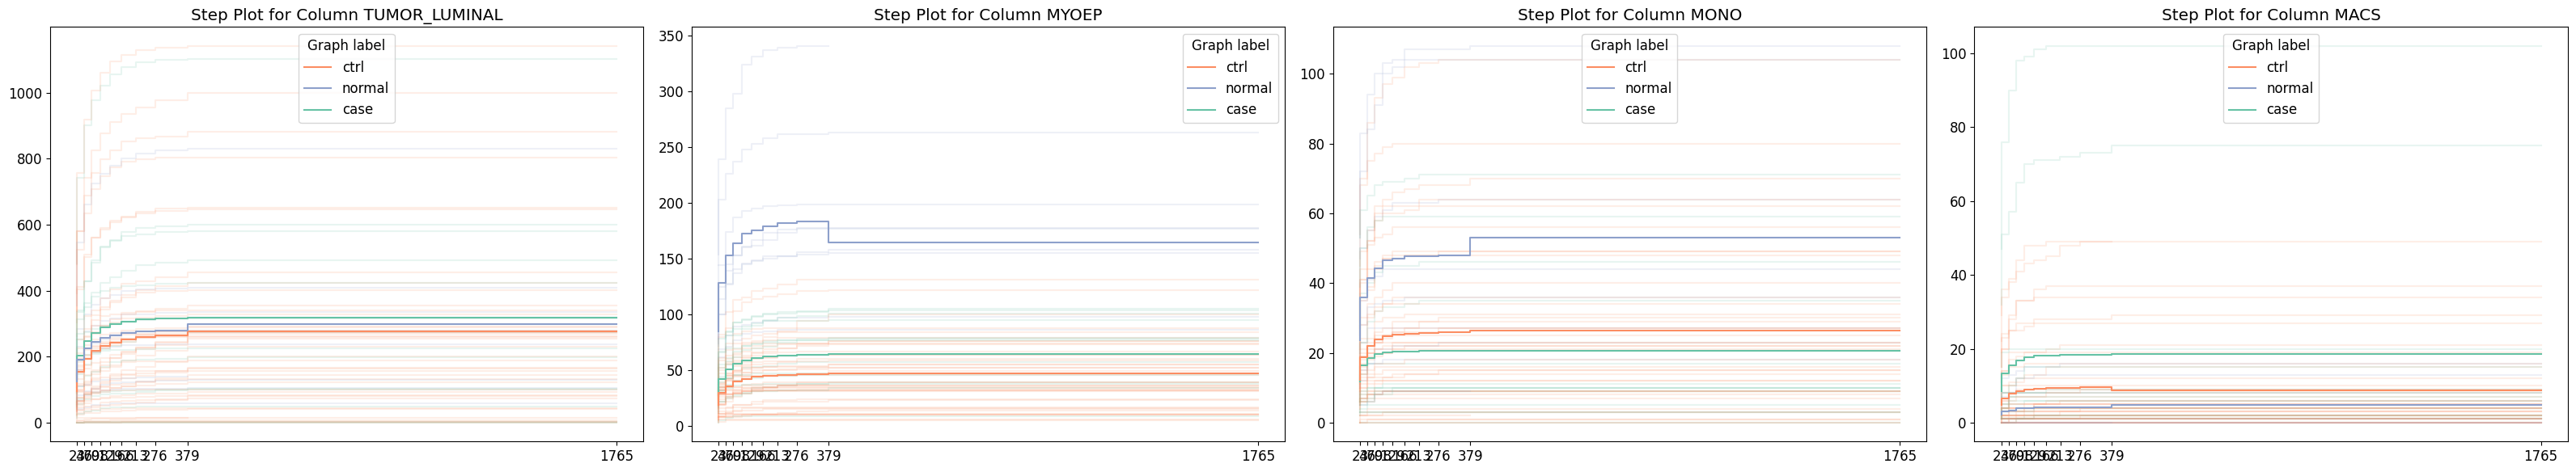

In [15]:
gc.pl._filtration_curves.compare_conditions(
        adata,
        node_labels=["TUMOR_LUMINAL", "MYOEP", "MONO", "MACS"]
)